# 1D Generative Adversarial Network using Tensorflow 2 - Keras API

## Select a One-Dimensional Function
$f(x) = x^2$

In [53]:
from math import sin
def f(x):
    x = (x+0.5)*3.142*2
    return sin(x)

In [54]:
import matplotlib.pyplot as plt

In [55]:
import numpy as np

In [56]:
def test_samples(n=100):
    X1 = np.random.rand(n) - 0.5
    X2 = np.vectorize(f)(X1)
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    return np.hstack((X1, X2))

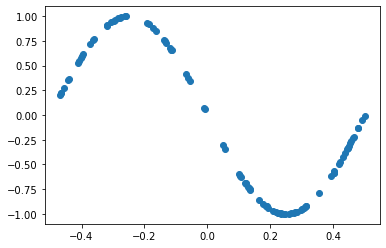

In [57]:
data = test_samples()
plt.scatter(data[:,0], data[:,1])

## Define a Discriminator model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

In [59]:
def define_discriminator(n_inputs = 2):
    model = Sequential()
    model.add(Dense(25, input_dim=n_inputs, kernel_initializer="he_uniform"))
    model.add(LeakyReLU())
    model.add(Dense(1))
    model.add(LeakyReLU())
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [60]:
def generate_real_samples(n):
    X1 = np.random.rand(n) - 0.5
    X2 = np.vectorize(f)(X1)
    X1 = X1.reshape(n,1)
    X2 = X2.reshape(n,1)
    X = np.hstack((X1, X2))
    y = np.ones((n,1))
    return X, y

## Define a Generator model

In [68]:
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation="relu", input_dim=latent_dim, kernel_initializer="he_uniform"))
    model.add(Dense(n_outputs, activation="linear"))
    return model

In [69]:
def generate_latent_points(latent_dim, n):
    x_input = np.random.randn(latent_dim*n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [70]:
def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = np.zeros((n,1))
    return X, y

## Define the GAN

In [71]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

## Evaluating performance of GAN

In [72]:
from IPython.display import clear_output
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    clear_output()
    X_real, y_real = generate_real_samples(n)
    X_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    plt.scatter(X_real[:, 0], X_real[:, 1], color="blue")
    plt.scatter(X_fake[:, 0], X_fake[:, 1], color="red")
    plt.show()
    _, acc_real = discriminator.evaluate(X_real, y_real, verbose=0)
    _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose=0)
    print("Epoch %4d => Real Accuracy = %.3f, Fake Accuracy = %.3f"%(epoch,acc_real,acc_fake))

## Training the GAN

In [73]:
from tqdm import tqdm
def train(generator, discriminator, gan, latent_dim, n_epochs=10000, n_batch=128):
    half_batch = n_batch//2
    for i in tqdm(range(n_epochs+1)):
        X_real, y_real = generate_real_samples(half_batch)
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
        discriminator.train_on_batch(X_real, y_real)
        discriminator.train_on_batch(X_fake, y_fake)
        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch,1))
        gan.train_on_batch(X_gan, y_gan)
        if i%100 == 0:
            summarize_performance(i, generator, discriminator, latent_dim)

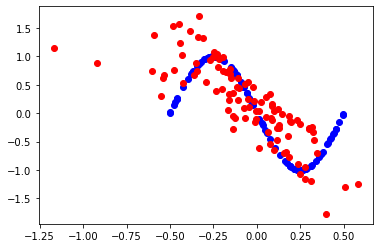

 90%|█████████████████████████████████████████████████████████████████████▎       | 9001/10001 [07:05<01:16, 13.12it/s]

In [ ]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan = define_gan(generator, discriminator)
train(generator, discriminator, gan, latent_dim)

## Final Model Output

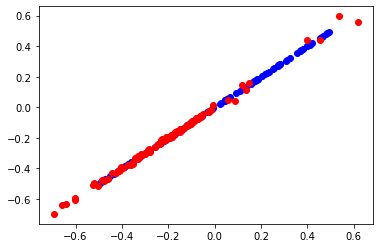

Epoch    0 => Real Accuracy = 0.560, Fake Accuracy = 0.940


In [47]:
summarize_performance(0, generator, discriminator, latent_dim)